Twitter Sentiment Analysis By Shromana Majumder(13/04/24)


**Sentiment Analysis:**
Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.



**Why is Sentiment Analysis Important?**
1. Customer Feedback Analysis
2. Brand Reputation Management
3. Product Development and Innovation
4. Competitor Analysis
5. Marketing Campaign Effectiveness


In this Project I have used Emotion detection types of analysis on Twitter data.
The sentiments happy, sad, angry, upset, jolly, pleasant, and so on come under emotion detection. It is also known as a lexicon method of sentiment analysis.

**Aim:**
Sentiment Analysis of Twitter Texts Using NLP & Machine Learning Algorithms

**Dataset**:
The sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive). Source: Kaggle

## Installing kaggle library

In [2]:
! pip install kaggle

### Uploading Kaggle.json file

In [3]:
### Configuring path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## To Fetch the Dataset

In [4]:
!kaggle datasets download -d kazanova/sentiment140

100% 80.9M/80.9M [00:00<00:00, 208MB/s]
100% 80.9M/80.9M [00:00<00:00, 204MB/s]


### Extracting Dataset From Zip File

In [5]:
from zipfile import ZipFile
data='/content/sentiment140.zip'
with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('Extraction is done!')

Extraction is done!


### Importing Libraries


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, precision_recall_curve,average_precision_score


The Natural Language Toolkit (NLTK) is a popular open-source library for natural language processing (NLP) in Python. It provides an easy-to-use interface for a wide range of tasks, including tokenization, stemming, lemmatization, parsing, and sentiment analysis.

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Text Preprocessing

Text preprocessing is a crucial step in performing sentiment analysis, as it helps to clean and normalize the text data, making it easier to analyze.

In [10]:
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=['target', 'ids', 'date', 'flag', 'user', 'text'])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Data Columns

In [11]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

#### Dimension

In [12]:
df.shape

(1600000, 6)

There are 6 columns in the Sentiment140 dataset with 1.6 million tweets such as:


1.   'target'
2.    ids'
3. 'date'
4. 'flag'
5. 'user'
6. 'text'

In [13]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [14]:
# Summary Statistics
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


### Duplicates

In [15]:
df.duplicated().sum()

0

* There is no Duplicate present in the Dataset





### Missing Values

In [16]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64



*   No Missing Value




## Distribution of Target

In [17]:
df_1=df['target'].value_counts()
df_target=pd.DataFrame(df_1)
df_target=df_target.reset_index()
df_target.columns = ['target', 'count']
df_target['target'] = df_target['target'].apply(lambda x: 1 if x == 4 else x)

# Now df_target DataFrame will have 1 for positive tweets and 0 for negative tweets
df_target.head()

,target,count
0,0,800000
1,1,800000




*   Balanced Dataset


In [20]:
df.replace({'target':{4:1}},inplace=True)

In [21]:
df.target.value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

 I replace the value 4 with 1 so, that positive tweet easily recognized as 1 and Negative Tweet as 0.

 ## User Column

In [22]:
df['user'].value_counts().head(10)

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64

lost dog has highest number of tweets.

# Data Analysis

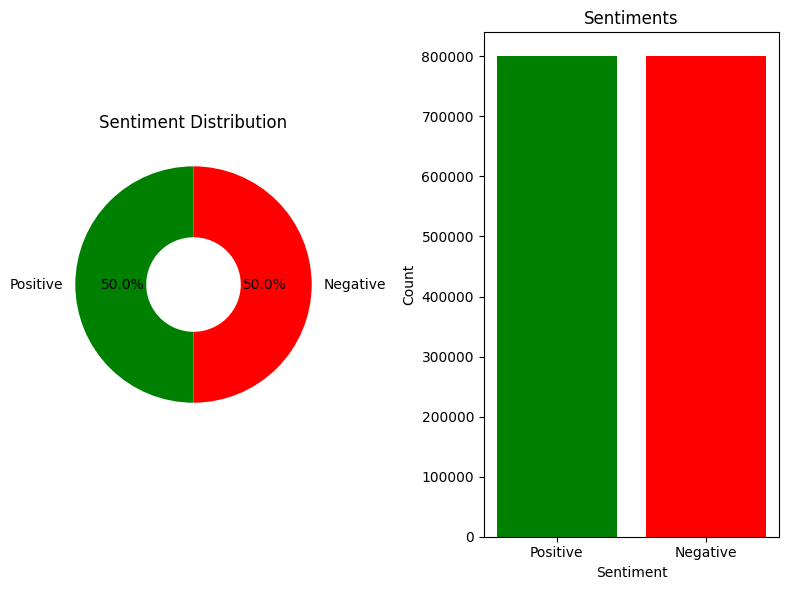

In [23]:
df_target = (
    df['target'].value_counts().to_frame(name='count').reset_index()
    .rename(columns={'index': 'target'})
)

# Convert 'target' to numeric (1 for positive, 0 for negative)
df_target['target'] = df_target['target'].replace(4, 1)

# Calculate user counts for positive and negative tweets
positive_tweets = df_target[df_target['target'] == 1]['count'].sum()
negative_tweets = df_target[df_target['target'] == 0]['count'].sum()

#sunplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
# Pie Chart for Sentiment Distribution
ax1.pie(
    [positive_tweets, negative_tweets],
    labels=['Positive', 'Negative'],
    autopct="%1.1f%%",
    startangle=90,
    colors=['green', 'red'],
    wedgeprops=dict(width=0.6)
)
ax1.set_title('Sentiment Distribution')

# Bar Chart for User Counts
ax2.bar(['Positive', 'Negative'], [positive_tweets, negative_tweets], color=['green', 'red'])
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
ax2.set_title('Sentiments')
# Tight layout for better overall plot arrangement
plt.tight_layout()

# Display the combined plot
plt.show()

## Text Cleaning

### Remove Html Tags and URLs
1.  It is Essential to remove the HTML tags in order to take the textual Data without any formatting Hence it also essential for the Consistency in the Data

In [24]:
# Function to remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# Function to remove URLs
def remove_urls(text):
    clean_text = re.sub(r'http\S+', '', text)
    return clean_text

## Lower Casing and Remove ChatWords
1.  It is necessary to convert the whole text to the lowercase Because by lowercasing the Consistency of the Data is maintained.
2. The Removing of ChatWords improved the Understanding and hence it makes easier for the model to understand the content accuratly

In [25]:


# Function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()


In [27]:
def replace_chat_words(text):
    chat_words = {
        "BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined",
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know",
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win",
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day",
        "Ngl": "Not gonna lie",
        "Rq": "real quick",
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)",
        "YAAAS": "Yes!",
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"
    }
    for word, expanded_form in chat_words.items():
        text = text.replace(word, expanded_form)
    return text

### Remove Punctuation and StopWords

Stop word removal is a crucial text preprocessing step in sentiment analysis that involves removing common and irrelevant words that are unlikely to convey much sentiment.

In [28]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
# Function to remove punctuation
def remove_punctuation(text):
    clean_text = ''.join(ch for ch in text if ch not in string.punctuation)
    return clean_text

In [30]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

### Remove Whitespace and Special Chararcters

In [31]:
# Function to remove whitespace
def remove_whitespace(text):
    return text.strip()

# Function to remove special characters
def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

In [33]:
# Combine all data cleaning functions into one preprocessing function
def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = convert_to_lowercase(text)
    text = replace_chat_words(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_whitespace(text)
    text = remove_special_characters(text)
    return text

# Apply preprocessing function to DataFrame
df['text'] = df['text'].apply(preprocess_text)

In [35]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats bummer shoulda got david...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad cant see


## Stemming

Stemming is a method in text processing that eliminates prefixes and suffixes from words, transforming them into their fundamental or root form, The main objective of stemming is to streamline and standardize words, enhancing the effectiveness of the natural language processing tasks.

In [32]:
port_stem=PorterStemmer()

In [34]:
def stemming(text):
  stemmed_content=re.sub('[^a-zA-Z]',' ',text)
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [36]:
df['stemmed_text']=df['text'].apply(stemming)

In [37]:
df.head()

,target,ids,date,flag,user,text,stemmed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats bummer shoulda got david...,switchfoot awww that bummer shoulda got david ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save 50...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad cant see,nationwideclass behav im mad cant see


### Generate the WordCloud

1. The WordCloud is used for the Visualization of the textual Data
2. It represents the most frequent words of the textual Data
3. By making the Word Cloud we can clearly visualize the frequent words of the textual Data
4. By making word Cloud we can condense the large volume of the textual Data into a compact visualization

In [40]:
# Define stopwords
stop_words = set(stopwords.words('english'))

In [41]:
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stop_words,
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

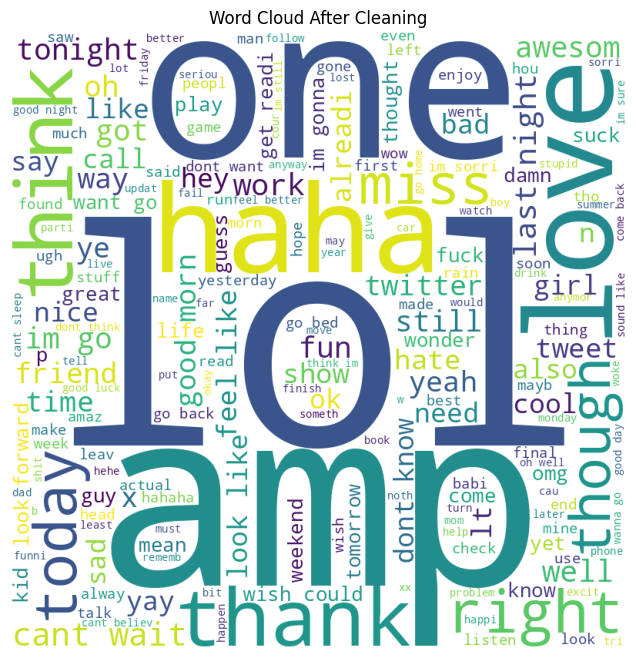

In [43]:
# Apply preprocessing function to DataFrame
df['word_cloud'] = df['stemmed_text'].apply(preprocess_text)

# Generate word cloud from cleaned text
generate_word_cloud(' '.join(df['word_cloud']), 'Word Cloud After Cleaning')

## Word frequency Plot


1. The Word Frequency plot Represents the Frequency of the words
2. It helps to Analyze the Distribution of the Data
3. It Depict that how frequently particular word found in the Textual Data

<ipython-input-47-702b4188f8c6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=freqs, palette='viridis')


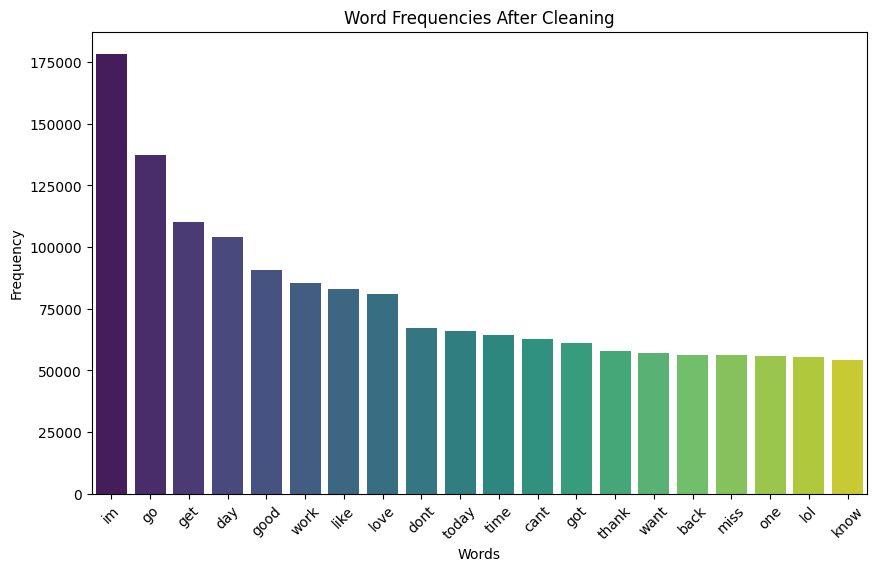

In [47]:
def plot_word_frequencies(text, title):
    word_counts = Counter(text.split())
    common_words = word_counts.most_common(20)

    words = [pair[0] for pair in common_words]
    freqs = [pair[1] for pair in common_words]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=words, y=freqs, palette='viridis')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(' '.join(df['stemmed_text']), 'Word Frequencies After Cleaning')

## Separating Features & Target

In [48]:
X=df['stemmed_text'].values
y=df['target'].values

## Train-Test Splitting

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [50]:
print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1600000,) (1600000,) (1280000,) (320000,) (1280000,) (320000,)


## Text to Numeric

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.
 Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.

In [52]:
vectorizer = TfidfVectorizer()

In [53]:
X_train = vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

## Model Training

In [54]:
# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)


In [55]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation

### Training Data accuracy

In [56]:
# Evaluate model
y_train_pred=logreg.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Logistic Regression Training Accuracy:", accuracy)

Logistic Regression Training Accuracy: 0.81706171875


## Test Data accuracy

In [57]:
y_test_pred=logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Logistic Regression Test Accuracy:", accuracy)

Logistic Regression Test Accuracy: 0.78284375


## ROC AUC Curve

ROC AUC is a performance metric that measures the area under the ROC curve. It provides a
single scalar value that represents the model’s ability to discriminate between positive and negative
classes across different thresholds. A value closer to 1 indicates better discrimination, while a value
of 0.5 suggests random guessing.

In [65]:
# Obtain predicted probabilities for the positive class (class 1)
out_pred_prob = logreg.predict_proba(X_test)[:, 1]


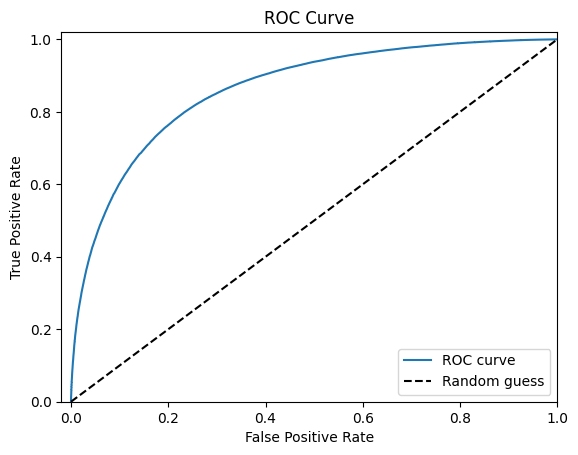

In [68]:
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, out_pred_prob)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()


In [69]:
ras = roc_auc_score(y_test, out_pred_prob)
ras

0.8619501389062499


*  A score of 0.86 suggests that the model has strong discriminatory power, with a relatively high true positive rate and a low false positive rate across different threshold values.

## Precision-recall curve

Average Precision (AP) is a performance metric used to evaluate the quality of a binary classification
model, particularly in cases where the classes are imbalanced. It summarizes the precision-recall
curve as the weighted mean of precisions achieved at each threshold, with the increase in recall
from the previous threshold used as the weight.

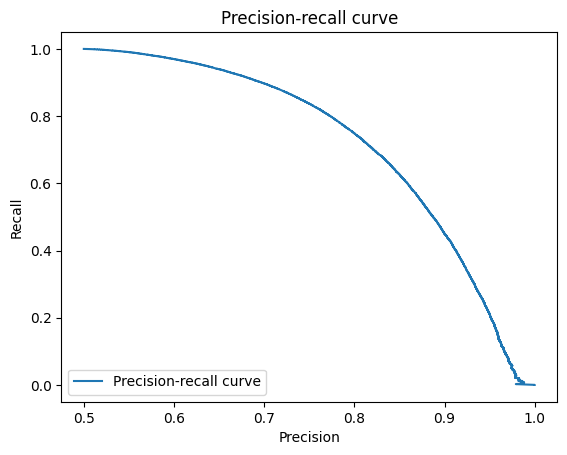

In [70]:
precision, recall, thresholds = precision_recall_curve(y_test, out_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")



In [71]:
aps = average_precision_score(y_test, out_pred_prob)
aps

0.8578255483836826

An average precision score of 0.85 suggests that the model has high precision across different recall levels, indicating that it effectively identifies positive cases while minimizing false positives.

## Classification Report

The classification report provides a summary of different evaluation metrics for each class in a classification problem. These metrics typically include precision, recall, F1-score, and support.

In [72]:
# Generate the classification report
report = classification_report(y_test, y_test_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    160000
           1       0.77      0.80      0.79    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

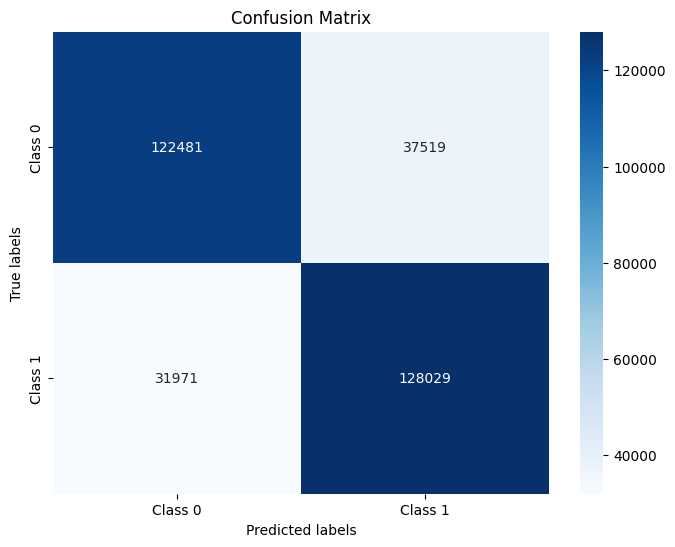

In [74]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Prediction

In [63]:
X_new=X_test[200]
pred=logreg.predict(X_new)
print(y_test[200])
print(pred)
if (pred[0]==0):
  print('Negative Tweet')
else:
  print('Positive Tweet')

0
[0]
Negative Tweet


In [64]:
X_new=X_test[1]
pred=logreg.predict(X_new)
print(y_test[1])
print(pred)
if (pred[0]==0):
  print('Negative Tweet')
else:
  print('Positive Tweet')

1
[1]
Positive Tweet
